# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 3 рубля
        сообщение: 3 рубля
        1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 1 рубль
        сообщение: 1 рубль
        1 Гб интернет-трафика: 150 рублей

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# загрузка файлов
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

## Обзор данных

In [3]:
def first_look(df):
    '''Функция для просмотра основной информации о датафрейме'''
    print('Первые 5 строк датасета:')
    display(df.head())
    print('Информация о датасете:')
    print(df.info())
    print(df.describe())
    print('Количество пропусков:')
    print(df.isna().sum())
    print('Количество дубликатов:')
    print(df.duplicated().sum())

In [4]:
first_look(df_calls)

Первые 5 строк датасета:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
Количество пропусков:
id           0
call_date    0
duration     0
user_id      0
dtype: int64
Количество дубликатов:
0


In [5]:
first_look(df_internet)

Первые 5 строк датасета:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    1724.830000    1499.000000
Количество пропусков:
Unnamed: 0 

In [6]:
first_look(df_messages)

Первые 5 строк датасета:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
Количество пропусков:
id              0
message_date    0
user_id         0
dtype: int64
Количество дубликатов:
0


In [7]:
first_look(df_tariffs)

Первые 5 строк датасета:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000       

In [8]:
first_look(df_users)

Первые 5 строк датасета:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
Количество пропусков:
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0

## Предобработка данных
### Приводим данные к нужным типам

In [9]:
# меняем формат даты
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
# добавляем столбец, отображающий месяц
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')
# округляем длительность звонков и меняем тип данных на целочисленный
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
# просмотрим датафрейм после всех преобразований
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01


In [10]:
# меняем формат даты
df_internet['call_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
# добавляем столбец, отображающий месяц
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')
# просмотрим датафрейм после всех преобразований
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,call_date,month
0,0,1000_0,112.95,2018-11-25,1000,2018-11-25,2018-11-01
1,1,1000_1,1052.81,2018-09-07,1000,2018-09-07,2018-09-01
2,2,1000_2,1197.26,2018-06-25,1000,2018-06-25,2018-06-01
3,3,1000_3,550.27,2018-08-22,1000,2018-08-22,2018-08-01
4,4,1000_4,302.56,2018-09-24,1000,2018-09-24,2018-09-01


In [11]:
# меняем формат даты
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
# добавляем столбец, отображающий месяц
df_messages['month'] = df_messages['message_date'].astype('datetime64[M]')
# просмотрим датафрейм после всех преобразований
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


### Сообщения

In [12]:
def build_hist(column):
    '''Функция для построения гистограммы'''
    plt.figure(figsize = (12, 6))
    plt.hist(column, bins = 30, color = 'grey', edgecolor = 'black', alpha = 0.7)
    plt.axvline(column.describe()['mean'], color = 'r', linewidth = 3, label = f'Mean value {column.describe()["mean"]:.2f}')
    plt.axvline(column.describe()['50%'], color = 'b', linewidth = 3, label = f'Median value {column.describe()["50%"]:.0f}')
    plt.legend()
    plt.title(column.name)

426

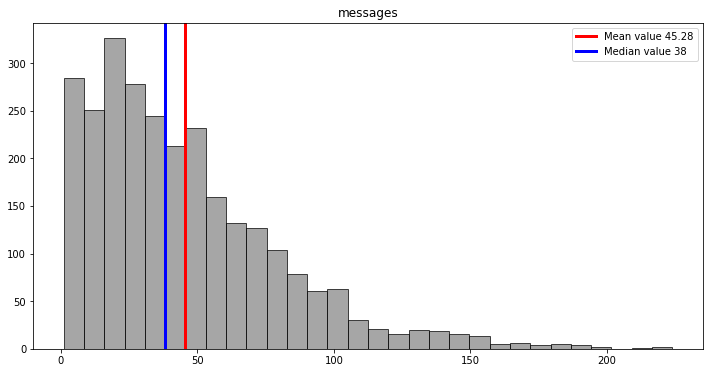

In [13]:
# посчитаем количество сообщений
messages_count = df_messages.groupby(['user_id', 'month']).agg(messages = ('id', 'count')).reset_index()
# построим гистограмму для сообщений
build_hist(messages_count['messages'])
# посмотрим, сколько пользователей пользовались sms-ками
messages_count['user_id'].nunique()

### Звонки

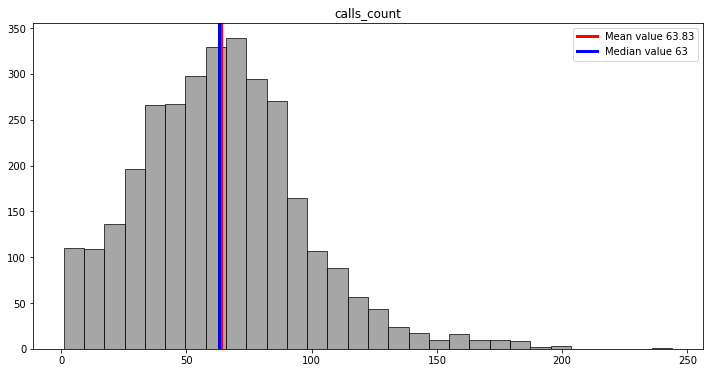

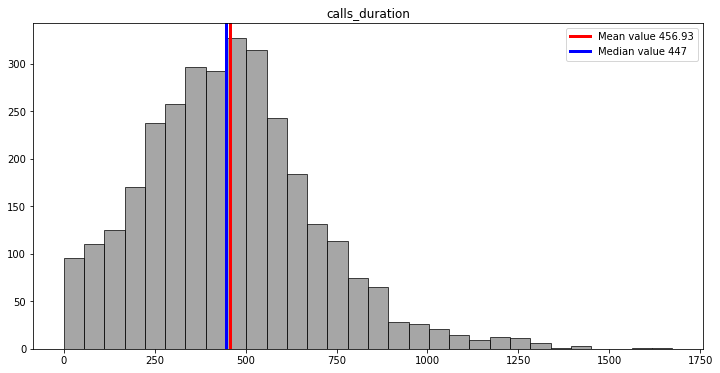

In [14]:
# рассчитаем среднее количество звонков и их продолжительность, построим гистограммы
calls = df_calls.groupby(['user_id', 'month']).agg(calls_count = ('id', 'count'), calls_duration = ('duration', 'sum')).reset_index()
build_hist(calls['calls_count'])
build_hist(calls['calls_duration'])

### Интернет

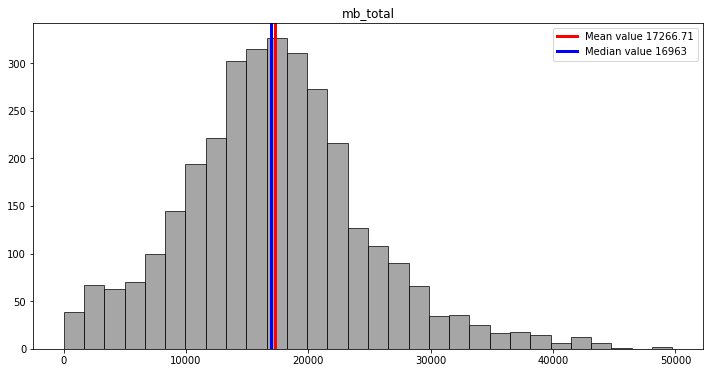

In [15]:
# построим гистограмму для интернета
internet = df_internet.groupby(['user_id', 'month']).agg(mb_total = ('mb_used', 'sum')).reset_index()
build_hist(internet['mb_total'])

In [16]:
# склеим нужные нам данные в один датафрейм
df = messages_count.merge(calls, on=['user_id', 'month'], how='outer').merge(internet, on=['user_id', 'month'])
df.head()

,user_id,month,messages,calls_count,calls_duration,mb_total
0,1000,2018-05-01,22.0,22.0,159.0,2253.49
1,1000,2018-06-01,60.0,43.0,172.0,23233.77
2,1000,2018-07-01,75.0,47.0,340.0,14003.64
3,1000,2018-08-01,81.0,52.0,408.0,14055.93
4,1000,2018-09-01,57.0,58.0,466.0,14568.91


### Заполняем пропуски

In [17]:
# посмотрим на пропуски
df.isna().sum()

user_id             0
month               0
messages          496
calls_count        39
calls_duration     39
mb_total            0
dtype: int64

Есть пропуски в сообщениях и звонках, логично предположить, что это связано с тем, что не все клиенты пользовались этими услугами. Заполним нулями.

In [18]:
# заполним пропуски нулями
df['messages'] = df['messages'].fillna(0)
df['calls_count'] = df['calls_count'].fillna(0)
df['calls_duration'] = df['calls_duration'].fillna(0)

In [19]:
# убедимся, что пропусков не осталось
df.isna().sum()

user_id           0
month             0
messages          0
calls_count       0
calls_duration    0
mb_total          0
dtype: int64

In [20]:
# просмотрим таблицу с тарифами
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
# просмотрим таблицу с пользователями
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [22]:
# добавим в наш датафрейм информацию о тарифе и пользовтелях
df = df.merge(df_users[['user_id', 'city', 'tariff']], on='user_id', how='left')
df = df.merge(df_tariffs, left_on='tariff', right_on='tariff_name', how='left').drop(columns=['tariff_name'])
df

,user_id,month,messages,calls_count,calls_duration,mb_total,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,22.0,22.0,159.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,60.0,43.0,172.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,75.0,47.0,340.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,81.0,52.0,408.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,57.0,58.0,466.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,1494,2018-08-01,0.0,32.0,262.0,6590.75,Омск,smart,50,15360,500,550,200,3,3
3198,1494,2018-09-01,0.0,66.0,501.0,16962.51,Омск,smart,50,15360,500,550,200,3,3
3199,1494,2018-10-01,0.0,52.0,354.0,17767.24,Омск,smart,50,15360,500,550,200,3,3
3200,1494,2018-11-01,0.0,63.0,411.0,18052.45,Омск,smart,50,15360,500,550,200,3,3


## Анализ данных

In [23]:
def calculate_revenue(row):
    '''Функция для нахождения выручки'''
    revenue = row.rub_monthly_fee
    if row.messages > row.messages_included:
        revenue += (row.messages - row.messages_included) * row.rub_per_message
    if row.calls_duration > row.minutes_included:
        revenue += (row.calls_duration - row.minutes_included) * row.rub_per_minute
    if row.mb_total > row.mb_per_month_included:
        revenue += np.ceil((row.mb_total - row.mb_per_month_included) * row.rub_per_gb / 1024)
    return round(revenue, 2)

In [24]:
# найдем выручку и добавим в новый столбец
df['revenue'] = df.apply(calculate_revenue, axis=1)

In [25]:
# посмотрим наибольшую выручку в месяц
df.sort_values(by='revenue').tail()

,user_id,month,messages,calls_count,calls_duration,mb_total,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
1486,1286,2018-12-01,68.0,95.0,739.0,35108.07,Москва,smart,50,15360,500,550,200,3,3,5179.0
2637,1486,2018-11-01,96.0,108.0,764.0,36266.11,Нижний Новгород,smart,50,15360,500,550,200,3,3,5564.0
221,1042,2018-12-01,75.0,121.0,728.0,37165.69,Хабаровск,smart,50,15360,500,550,200,3,3,5568.0
1325,1261,2018-12-01,22.0,141.0,1074.0,32650.91,Казань,smart,50,15360,500,550,200,3,3,5650.0
2638,1486,2018-12-01,83.0,133.0,1007.0,38552.45,Нижний Новгород,smart,50,15360,500,550,200,3,3,6700.0


In [26]:
def build_tariff_boxplot(df, column):
    '''Функция для построения ящика с усами'''
    fig = plt.figure(figsize = (24, 6))
    df[df['tariff']=='smart'].boxplot(column, ax = plt.subplot(1,2,1))
    df[df['tariff']=='ultra'].boxplot(column, ax = plt.subplot(1,2,2))

In [27]:
def build_tariff_hist(df, column, included_smart, included_ultra):
    '''Функция для построения гистограммы по тарифам'''
    smart = df.query('tariff == "smart"')[column]
    ultra = df.query('tariff == "ultra"')[column]
    plt.figure(figsize=(24, 6))
    plt.hist(smart, bins=50, color='orange', edgecolor='black', alpha=0.5, label='smart')
    plt.hist(ultra, bins=50, color='green', edgecolor='black', alpha=0.5, label='ultra')
    plt.axvline(smart.describe()['mean'], color='orange', linestyle='dashed', linewidth=3, label = f'Smart mean value {smart.describe()["mean"]:.2f}')
    plt.axvline(ultra.describe()['mean'], color='green', linestyle='dashed', linewidth=3, label = f'Ultra mean value {ultra.describe()["mean"]:.2f}')
    plt.axvline(included_smart, color='orange', linewidth=3, label=f'Included in "Smart" {included_smart}')
    plt.axvline(included_ultra, color='green', linewidth=3, label=f'Included in "Ultra" {included_ultra}')
    plt.legend()
    plt.title(column)

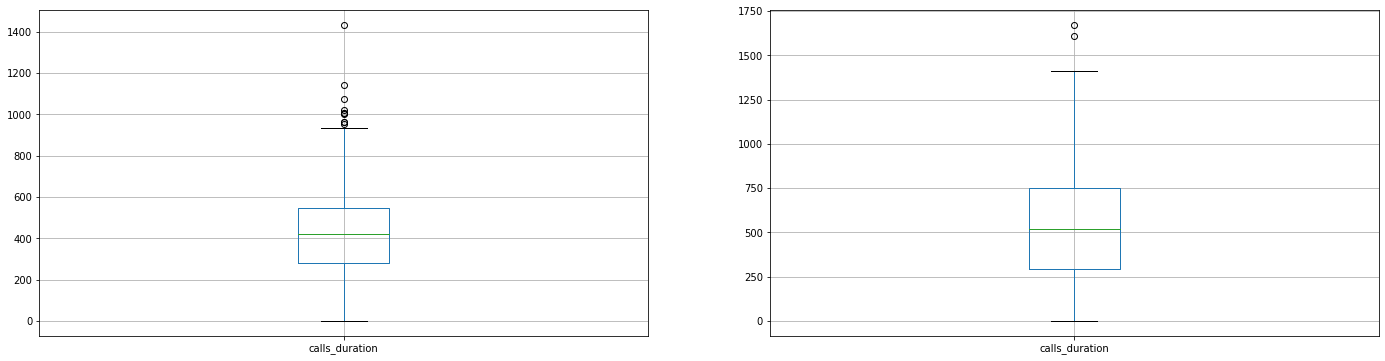

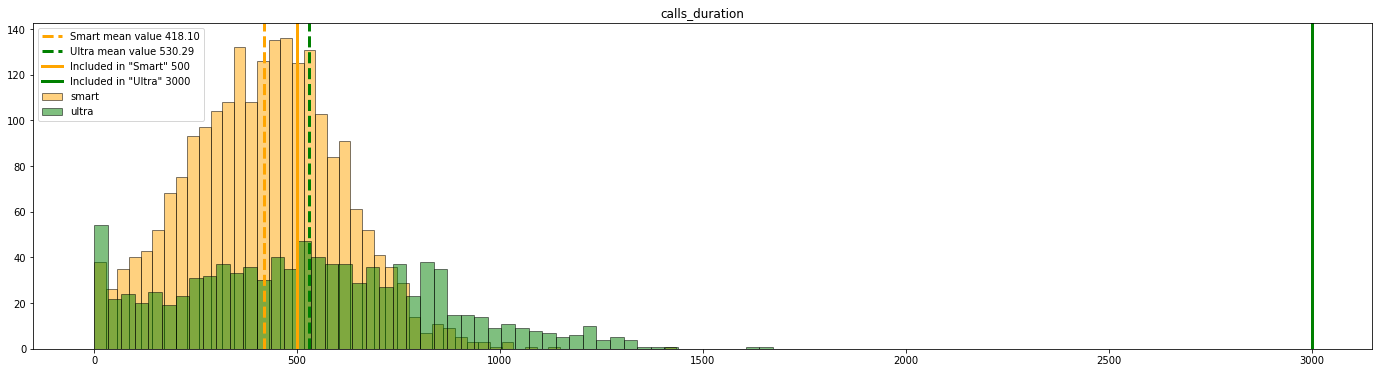

In [28]:
# построим ящик с усами и гистограмму по звонкам
build_tariff_boxplot(df, 'calls_duration')
build_tariff_hist(df, 'calls_duration', 500, 3000)

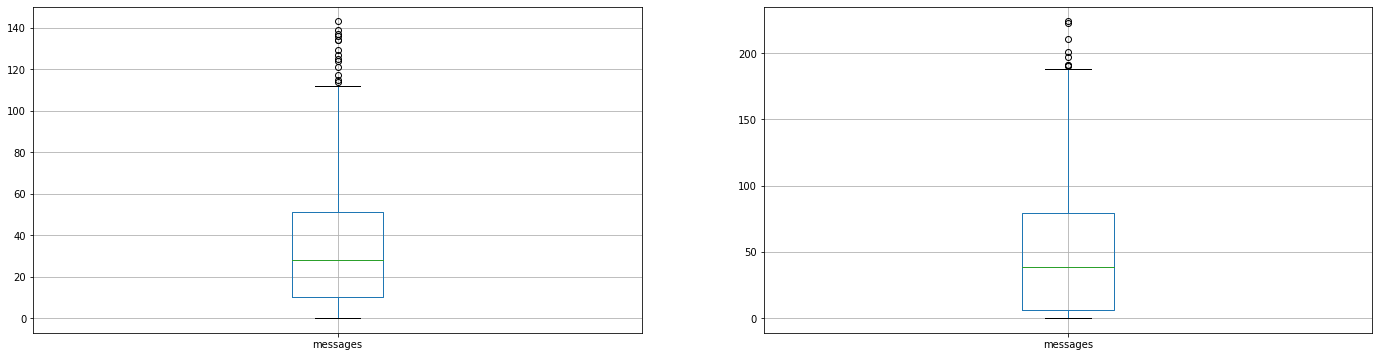

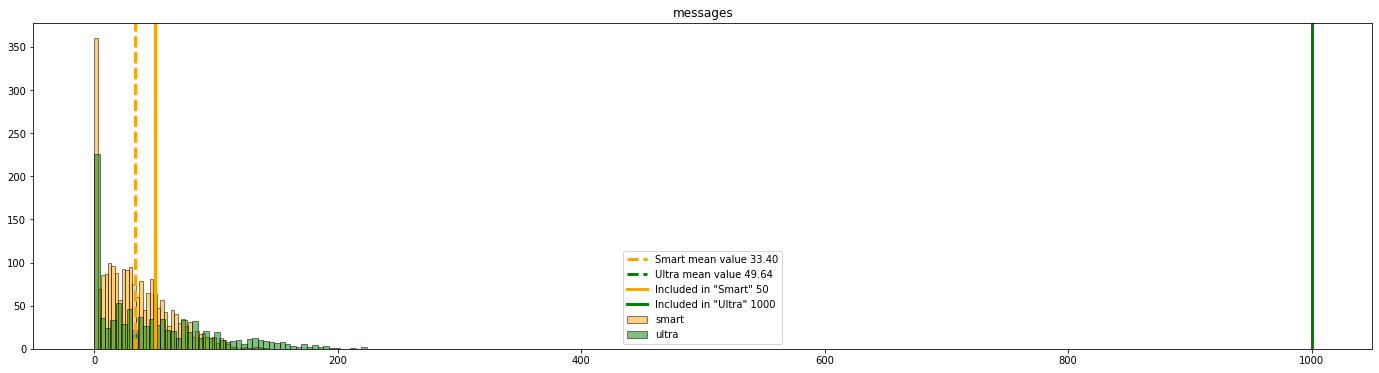

In [29]:
# построим ящик с усами и гистограмму по сообщениям
build_tariff_boxplot(df, 'messages')
build_tariff_hist(df, 'messages', 50, 1000)

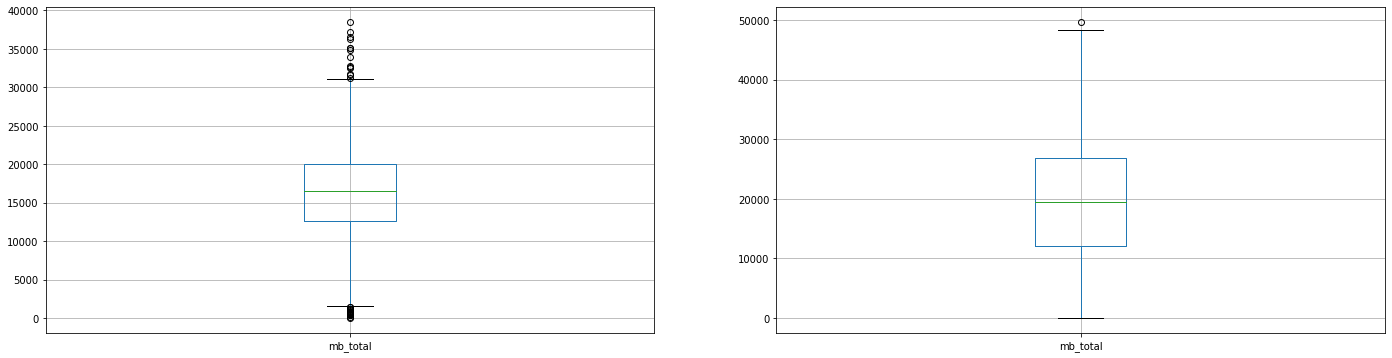

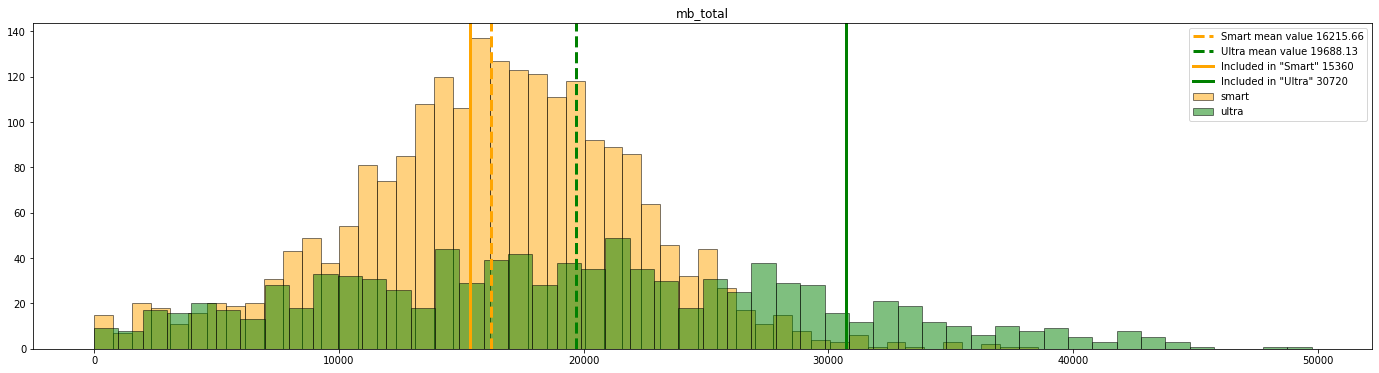

In [30]:
# построим ящик с усами и гистограмму по интернету
build_tariff_boxplot(df, 'mb_total')
build_tariff_hist(df, 'mb_total', 15360, 30720)

In [31]:
def tariff_describe(tariff):
    '''Функция для описания среднестатистического использования тарифа'''
    df_tariff = df[df['tariff']==tariff]
    print(f'{tariff}, в среднем за месяц:')
    print('')
    print('Минут разговора:', df_tariff['calls_duration'].describe()['mean'].round(2))
    print('Сообщений:', df_tariff['messages'].describe()['mean'].round(2))
    print('Мегабайт интернета:', df_tariff['mb_total'].describe()['mean'].round(2))
    print('Выручка: ', df_tariff['revenue'].describe()['mean'].round(2), 'руб')
    print('')
    print('Стандартное отклонение минут разговора:', df_tariff['calls_duration'].describe()['std'].round(2))
    print('Стандартное отклонение сообщений:', df_tariff['messages'].describe()['std'].round(2))
    print('Стандартное отклонение мегабайт интернета:', df_tariff['mb_total'].describe()['std'].round(2))
    print('Стандартное отклонение выручки:', df_tariff['revenue'].describe()['std'].round(2))
    print('')
    print('Дисперсия минут разговора:', (df_tariff['calls_duration'].describe()['std'] ** 2).round(2))
    print('Дисперсия сообщений:', (df_tariff['messages'].describe()['std'] ** 2).round(2))
    print('Дисперсия мегабайт интернета:', (df_tariff['mb_total'].describe()['std'] ** 2).round(2))
    print('Дисперсия выручки:', (df_tariff['revenue'].describe()['std'] ** 2).round(2))

In [32]:
# посмотрим информацию о тарифе "Smart"
tariff_describe('smart')

smart, в среднем за месяц:

Минут разговора: 418.1
Сообщений: 33.4
Мегабайт интернета: 16215.66
Выручка:  1231.05 руб

Стандартное отклонение минут разговора: 190.2
Стандартное отклонение сообщений: 28.23
Стандартное отклонение мегабайт интернета: 5861.74
Стандартное отклонение выручки: 785.92

Дисперсия минут разговора: 36174.76
Дисперсия сообщений: 796.7
Дисперсия мегабайт интернета: 34359951.68
Дисперсия выручки: 617668.14


In [33]:
# посмотрим информацию о тарифе "Ultra"
tariff_describe('ultra')

ultra, в среднем за месяц:

Минут разговора: 530.29
Сообщений: 49.64
Мегабайт интернета: 19688.13
Выручка:  2061.18 руб

Стандартное отклонение минут разговора: 317.33
Стандартное отклонение сообщений: 47.98
Стандартное отклонение мегабайт интернета: 9929.2
Стандартное отклонение выручки: 356.82

Дисперсия минут разговора: 100698.78
Дисперсия сообщений: 2301.76
Дисперсия мегабайт интернета: 98589055.18
Дисперсия выручки: 127319.91


**Выводы**

1. Пользователи тарифа "Ультра" в среднем больше тратят времени на разговоры (530 минут против 418), пишут больше смс-сообщений (50 против 33) и используют больше мобильного трафика (19688 МБ против 16215 МБ), чем пользователи тарифа "Смарт".
2. Пользователи тарифа "Смарт" гораздо чаще не укладываются в заданные тарифом лимиты, чем пользователи тарифа "Ультра".
3. Смс-сообщениями пользуются не все клиенты, а лимит в 1000 сообщений в тарифе "Ультра" не расходует вообще никто.
4. Аналогичная ситуация с минутами в тарифе "Ультра" - никто не выговаривает 3000 минут в месяц.

## Проверка гипотез

**Гипотеза о равенстве средних двух генеральных совокупностей №1**

Сформулируем гипотезы:

H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается

H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [34]:
# проведем Т-тест Стьюдента
ultra = df[df['tariff'] == 'ultra']['revenue']
smart = df[df['tariff'] == 'smart']['revenue']
alpha = 0.05
results = st.ttest_ind(ultra, smart, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.027394509119177e-297
Отвергаем нулевую гипотезу


**Вывод по гипотезе 1:**

Нулевой гипотезой была гипотеза о равенстве средних наших выборок. Малое значение p-value говорит нам о том, что вероятность того, что прибыль обоих тарифов совпадает, крайне мала, потому нулевую гипотезу отвергаем.

**Гипотеза о равенстве средних двух генеральных совокупностей №2**

Сформулируем гипотезы:

H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [35]:
# просмотрим уникальные значения городов
df['city'].unique()

array(['Краснодар', 'Стерлитамак', 'Москва', 'Новокузнецк',
       'Набережные Челны', 'Челябинск', 'Пермь', 'Самара',
       'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа', 'Томск',
       'Чита', 'Мурманск', 'Петрозаводск', 'Тверь', 'Екатеринбург',
       'Махачкала', 'Ульяновск', 'Вологда', 'Тюмень', 'Череповец',
       'Ярославль', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ',
       'Тула', 'Саратов', 'Казань', 'Иркутск', 'Курск', 'Калуга',
       'Якутск', 'Астрахань', 'Химки', 'Владикавказ', 'Сочи', 'Саранск',
       'Волгоград', 'Ижевск', 'Новосибирск', 'Брянск', 'Тольятти',
       'Нижний Тагил', 'Белгород', 'Воронеж', 'Барнаул', 'Красноярск',
       'Архангельск', 'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза',
       'Волжский', 'Магнитогорск', 'Нижний Новгород', 'Кострома',
       'Владивосток', 'Тамбов', 'Балашиха', 'Калининград',
       'Ростов-на-Дону', 'Смоленск', 'Нижневартовск', 'Севастополь',
       'Владимир', 'Курган', 'Новороссийск', 'Орёл', 'Грозны

In [36]:
# проведем Т-тест Стьюдента
moscow = df[df['city'] == 'Москва']['revenue']
other = df[df['city'] != 'Москва']['revenue']
results = st.ttest_ind(moscow, other, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.43869407957329654
Не получилось отвергнуть нулевую гипотезу


**Вывод по гипотезе 2:**

Полученное нами p-value равно 0.44, а значит, есть большая вероятность того, что отличие средних значений наших выборок случайно и мы не можем отвергнуть нулевую гипотезу, которая говорит нам о равенстве средних значений.

## Общий вывод

Из предоставленных данных была выведена все необходимая для исследования информация - значения израсходованных минут, сообщений и мегабайт. Были построены графики, наглядно отображающие количество звонков, смс-ок и трафика, а также была посчитана прибыль от каждого клиента за каждый месяц. В дальнейшем все клиенты были разделены по группам и были проверены две гипотезы: о разнице выручки в зависимости от тарифа и в зависимости от места жительства. Ниже предоставлены подробные результаты исследования:

1. Среднее количество израсходованных минут, сообщений и мегабайт не сильно отличается у пользователей разных тарифов, хотя базовая стоимость тарифа отличается почти в 4 раза.
2. Полезность большого количества сообщений и звонков в тарифе "Ультра" крайне сомнительна, никто не выговаривает 3000 минут и не пишет 1000 сообщений в месяц.
3. А вот интернет-трафика иногда не хватает пользователями даже в тарифе "Ультра".
4. Тариф "Ультра" приносит большую выручку, чем тариф "Смарт".
5. В тарифе "Смарт" клиенты часто не укладываются в лимиты, что может приводить к разочарованию в тарифе и оттоку пользователей.
6. Разницы в выручке из Москвы и регионов нет.